In this tutorial, we switch from manual implementation of the recurrent network to using predefined recurrent cells and layers. Apart from reproducing the signal from the past, we also predict it in the future.

In [1]:
import math
import matplotlib.pyplot as plt
import torch

Prepare the data and target signals as in the previous example:

In [2]:
frames = 101
samples = 100
size0, size1, size2 = 1, 16, 1

TIME = torch.linspace(0., 10., frames)
PHASE = 2. * math.pi * torch.rand(samples, size0)
SIGNAL = torch.sin(TIME[:, None, None] + PHASE)
TARGET = torch.sin(TIME[:, None, None] + PHASE - math.pi / 2.)

Construct the recurrent cell, the model, and perform training as in the previous example:

0 1.1774736642837524
1 0.2902866303920746
2 0.2388918399810791
3 0.19512851536273956
4 0.15937168896198273
5 0.1317048966884613
6 0.11171012371778488
7 0.09835226833820343
8 0.09007727354764938
9 0.08518410474061966
10 0.08226878196001053
11 0.08042442053556442
12 0.07915611565113068
13 0.0782102644443512
14 0.07745391875505447
15 0.07681360840797424
16 0.07624690979719162
17 0.07572881132364273
18 0.0752442479133606
19 0.07478416711091995
20 0.07434297353029251
21 0.07391725480556488
22 0.07350485026836395
23 0.07310433685779572
24 0.07271479815244675
25 0.07233554124832153
26 0.07196606695652008
27 0.07160596549510956
28 0.0712549164891243
29 0.07091259956359863
30 0.07057873159646988
31 0.07025305926799774
32 0.06993532925844193
33 0.06962531059980392
34 0.06932274252176285
35 0.06902741640806198
36 0.06873913109302521
37 0.06845763325691223
38 0.06818274408578873
39 0.06791424751281738
40 0.06765194237232208
41 0.0673956498503685
42 0.06714518368244171
43 0.0669003501534462
44 0.06

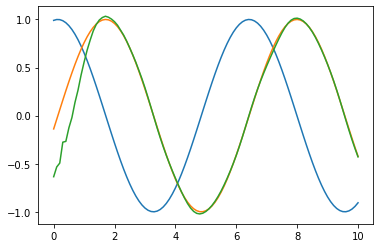

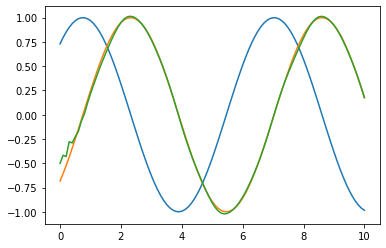

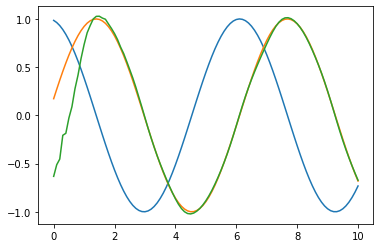

In [3]:
BIAS1 = torch.zeros(size1, requires_grad = True)
WEIGHT1F = torch.empty(size0, size1, requires_grad = True)
WEIGHT1S = torch.empty(size1, size1, requires_grad = True)
BIAS2 = torch.zeros(size2, requires_grad = True)
WEIGHT2 = torch.empty(size1, size2, requires_grad = True)

torch.nn.init.xavier_normal_(WEIGHT1F)
torch.nn.init.xavier_normal_(WEIGHT1S)
torch.nn.init.xavier_normal_(WEIGHT2)

def cell(FRAME, STATE):
    ACTIVATION = BIAS1 + FRAME @ WEIGHT1F + STATE @ WEIGHT1S
    ACTIVITY = torch.tanh(ACTIVATION)
    return ACTIVITY

def model(SIGNAL):
    frames, samples = SIGNAL.size(0), SIGNAL.size(1)
    ACTIVITY1 = torch.empty(frames, samples, size1)
    STATE = torch.zeros(samples, size1)
    for frame in range(frames):
        STATE = cell(SIGNAL[frame], STATE)
        ACTIVITY1[frame] = STATE
    ACTIVATION2 = torch.empty(frames, samples, size2)
    for frame in range(frames):
        ACTIVATION2[frame] = BIAS2 + ACTIVITY1[frame] @ WEIGHT2
    ACTIVITY2 = ACTIVATION2
    return ACTIVITY2

optimizer = torch.optim.SGD([BIAS1, WEIGHT1F, WEIGHT1S, BIAS2, WEIGHT2], lr = 0.01)
for epoch in range(1000):
    RESULT = model(SIGNAL)
    LOSS = torch.square(RESULT - TARGET).mean()
    optimizer.zero_grad()
    LOSS.backward()
    optimizer.step()
    print(epoch, LOSS.item(), flush = True)

RESULT = model(SIGNAL).detach()

for sample in range(3):
    plt.plot(TIME, SIGNAL[:, sample, 0])
    plt.plot(TIME, TARGET[:, sample, 0])
    plt.plot(TIME, RESULT[:, sample, 0])
    plt.show()

The linear transformation in the second layer is applied to each frame in a loop. Let this loop be executed by the matrix multiplication operator:

0 0.8421339392662048
1 0.5700939297676086
2 0.48376721143722534
3 0.4240714907646179
4 0.37019824981689453
5 0.3183017373085022
6 0.2677808701992035
7 0.21935735642910004
8 0.17485980689525604
9 0.13702885806560516
10 0.1086314469575882
11 0.0907822996377945
12 0.08177880942821503
13 0.07813624292612076
14 0.07684225589036942
15 0.07632806152105331
16 0.07602687925100327
17 0.07577860355377197
18 0.07554417848587036
19 0.07531482726335526
20 0.07508858293294907
21 0.07486504316329956
22 0.07464408129453659
23 0.07442565262317657
24 0.07420971989631653
25 0.07399623095989227
26 0.07378516346216202
27 0.07357648760080338
28 0.07337017357349396
29 0.07316617667675018
30 0.07296445965766907
31 0.07276501506567001
32 0.07256777584552765
33 0.07237274199724197
34 0.07217987626791
35 0.07198914140462875
36 0.07180050760507584
37 0.07161395251750946
38 0.07142943143844604
39 0.0712469220161438
40 0.07106640934944153
41 0.07088785618543625
42 0.07071123272180557
43 0.07053650170564651
44 0.0703

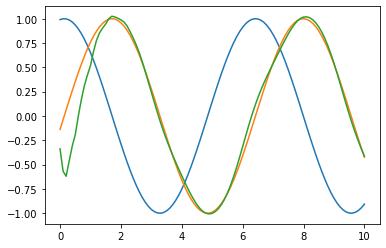

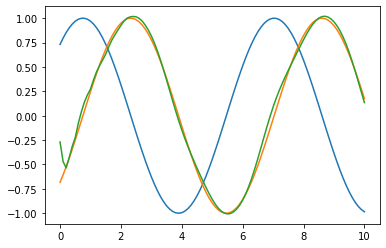

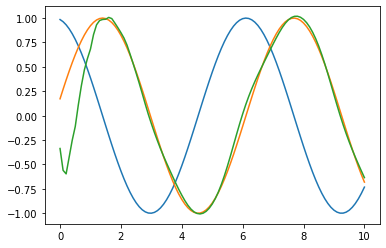

In [4]:
BIAS1 = torch.zeros(size1, requires_grad = True)
WEIGHT1F = torch.empty(size0, size1, requires_grad = True)
WEIGHT1S = torch.empty(size1, size1, requires_grad = True)
BIAS2 = torch.zeros(size2, requires_grad = True)
WEIGHT2 = torch.empty(size1, size2, requires_grad = True)

torch.nn.init.xavier_normal_(WEIGHT1F)
torch.nn.init.xavier_normal_(WEIGHT1S)
torch.nn.init.xavier_normal_(WEIGHT2)

def cell(FRAME, STATE):
    ACTIVATION = BIAS1 + FRAME @ WEIGHT1F + STATE @ WEIGHT1S
    ACTIVITY = torch.tanh(ACTIVATION)
    return ACTIVITY

def model(SIGNAL):
    frames, samples = SIGNAL.size(0), SIGNAL.size(1)
    ACTIVITY1 = torch.empty(frames, samples, size1)
    STATE = torch.zeros(samples, size1)
    for frame in range(frames):
        STATE = cell(SIGNAL[frame], STATE)
        ACTIVITY1[frame] = STATE
    ACTIVATION2 = BIAS2 + ACTIVITY1 @ WEIGHT2
    ACTIVITY2 = ACTIVATION2
    return ACTIVITY2

optimizer = torch.optim.SGD([BIAS1, WEIGHT1F, WEIGHT1S, BIAS2, WEIGHT2], lr = 0.01)
for epoch in range(1000):
    RESULT = model(SIGNAL)
    LOSS = torch.square(RESULT - TARGET).mean()
    optimizer.zero_grad()
    LOSS.backward()
    optimizer.step()
    print(epoch, LOSS.item(), flush = True)

RESULT = model(SIGNAL).detach()

for sample in range(3):
    plt.plot(TIME, SIGNAL[:, sample, 0])
    plt.plot(TIME, TARGET[:, sample, 0])
    plt.plot(TIME, RESULT[:, sample, 0])
    plt.show()

The linear transformation in the second layer is precisely what the predefined linear layer does. Replace the former with the latter:

0 0.5826442837715149
1 0.5632419586181641
2 0.5463705062866211
3 0.5313011407852173
4 0.5174673199653625
5 0.5044245719909668
6 0.4918185770511627
7 0.47935962677001953
8 0.4668044149875641
9 0.453943133354187
10 0.44059163331985474
11 0.42658692598342896
12 0.4117875099182129
13 0.3960771858692169
14 0.37937217950820923
15 0.36163148283958435
16 0.34286820888519287
17 0.3231601119041443
18 0.30265599489212036
19 0.2815753221511841
20 0.2602001428604126
21 0.23885966837406158
22 0.2179105430841446
23 0.19771547615528107
24 0.1786218136548996
25 0.16094112396240234
26 0.1449282020330429
27 0.1307605654001236
28 0.11852112412452698
29 0.10818920284509659
30 0.09964576363563538
31 0.09269534051418304
32 0.0871000587940216
33 0.0826156735420227
34 0.07901912927627563
35 0.07612261176109314
36 0.07377591729164124
37 0.07186193764209747
38 0.0702899843454361
39 0.06898965686559677
40 0.06790583580732346
41 0.06699509173631668
42 0.06622298061847687
43 0.06556212902069092
44 0.064990676939487

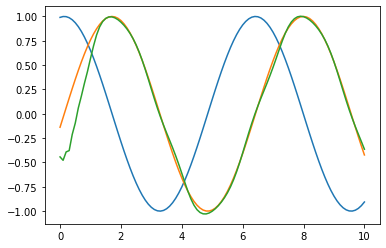

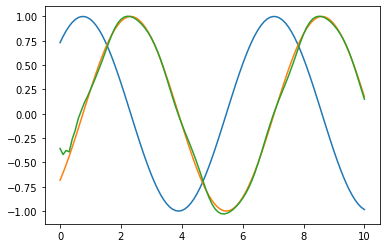

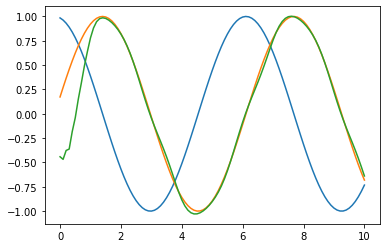

In [5]:
BIAS1 = torch.zeros(size1, requires_grad = True)
WEIGHT1F = torch.empty(size0, size1, requires_grad = True)
WEIGHT1S = torch.empty(size1, size1, requires_grad = True)

torch.nn.init.xavier_normal_(WEIGHT1F)
torch.nn.init.xavier_normal_(WEIGHT1S)

def cell(FRAME, STATE):
    ACTIVATION = BIAS1 + FRAME @ WEIGHT1F + STATE @ WEIGHT1S
    ACTIVITY = torch.tanh(ACTIVATION)
    return ACTIVITY

linear = torch.nn.Linear(size1, size2)

def model(SIGNAL):
    frames, samples = SIGNAL.size(0), SIGNAL.size(1)
    ACTIVITY1 = torch.empty(frames, samples, size1)
    STATE = torch.zeros(samples, size1)
    for frame in range(frames):
        STATE = cell(SIGNAL[frame], STATE)
        ACTIVITY1[frame] = STATE
    ACTIVATION2 = linear(ACTIVITY1)
    ACTIVITY2 = ACTIVATION2
    return ACTIVITY2

optimizer = torch.optim.SGD([BIAS1, WEIGHT1F, WEIGHT1S] + list(linear.parameters()), lr = 0.01)
for epoch in range(1000):
    RESULT = model(SIGNAL)
    LOSS = torch.square(RESULT - TARGET).mean()
    optimizer.zero_grad()
    LOSS.backward()
    optimizer.step()
    print(epoch, LOSS.item(), flush = True)

RESULT = model(SIGNAL).detach()

for sample in range(3):
    plt.plot(TIME, SIGNAL[:, sample, 0])
    plt.plot(TIME, TARGET[:, sample, 0])
    plt.plot(TIME, RESULT[:, sample, 0])
    plt.show()

There is a predefined recurrent cell which does exactly the same as our cell function. Use it instead of that function:

0 0.6047287583351135
1 0.5912900567054749
2 0.5796190500259399
3 0.5694571137428284
4 0.5605894923210144
5 0.5528360605239868
6 0.5460447669029236
7 0.540086567401886
8 0.534851610660553
9 0.5302456617355347
10 0.5261878371238708
11 0.5226082801818848
12 0.5194467902183533
13 0.5166506767272949
14 0.5141746401786804
15 0.5119790434837341
16 0.5100291967391968
17 0.5082949995994568
18 0.5067499876022339
19 0.5053710341453552
20 0.5041380524635315
21 0.5030331015586853
22 0.5020407438278198
23 0.5011472105979919
24 0.5003405213356018
25 0.4996102452278137
26 0.4989469647407532
27 0.4983426332473755
28 0.49779006838798523
29 0.4972829818725586
30 0.49681586027145386
31 0.49638375639915466
32 0.49598249793052673
33 0.49560827016830444
34 0.49525773525238037
35 0.4949280619621277
36 0.49461662769317627
37 0.49432113766670227
38 0.4940396845340729
39 0.4937705099582672
40 0.49351203441619873
41 0.49326291680336
42 0.49302202463150024
43 0.49278807640075684
44 0.49256041646003723
45 0.4923381

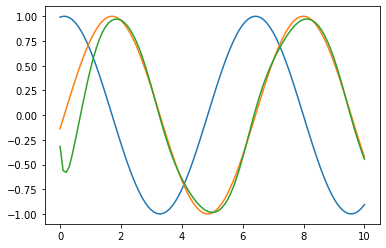

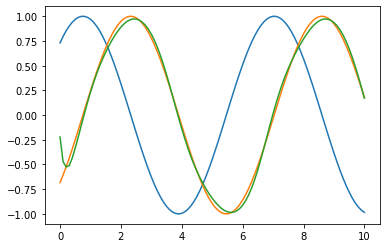

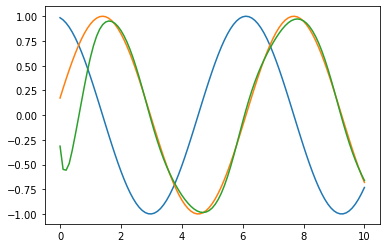

In [6]:
cell = torch.nn.RNNCell(size0, size1)
linear = torch.nn.Linear(size1, size2)

def model(SIGNAL):
    frames, samples = SIGNAL.size(0), SIGNAL.size(1)
    ACTIVITY1 = torch.zeros(frames, samples, size1)
    STATE = torch.zeros(samples, size1)
    for frame in range(frames):
        STATE = cell(SIGNAL[frame], STATE)
        ACTIVITY1[frame] = STATE
    ACTIVATION2 = linear(ACTIVITY1)
    ACTIVITY2 = ACTIVATION2
    return ACTIVITY2

optimizer = torch.optim.SGD(list(cell.parameters()) + list(linear.parameters()), lr = 0.01)
for epoch in range(1000):
    RESULT = model(SIGNAL)
    LOSS = torch.square(RESULT - TARGET).mean()
    optimizer.zero_grad()
    LOSS.backward()
    optimizer.step()
    print(epoch, LOSS.item(), flush = True)

RESULT = model(SIGNAL).detach()

for sample in range(3):
    plt.plot(TIME, SIGNAL[:, sample, 0])
    plt.plot(TIME, TARGET[:, sample, 0])
    plt.plot(TIME, RESULT[:, sample, 0])
    plt.show()

The predefined recurrent cell has two bias terms that are simply added. This is more suitable for GPU computations. But such spurious parameters impede the minimization as can be seen. There is also a predefined recurrent layer that unrolls the recurrent cell. Use it as the first layer instead of the manual loop. Apart from the actual activity, the predefined layer returns some other inorfmation that we ignore here:

0 0.5654129385948181
1 0.5592182278633118
2 0.5536602139472961
3 0.5486688017845154
4 0.5441821813583374
5 0.5401461720466614
6 0.5365127325057983
7 0.5332393050193787
8 0.5302881002426147
9 0.5276256203651428
10 0.5252220630645752
11 0.523050844669342
12 0.5210883617401123
13 0.5193130970001221
14 0.5177064538002014
15 0.5162513256072998
16 0.51493239402771
17 0.5137362480163574
18 0.5126505494117737
19 0.5116643905639648
20 0.5107678771018982
21 0.509952187538147
22 0.509209394454956
23 0.5085322260856628
24 0.5079143047332764
25 0.5073499083518982
26 0.5068337917327881
27 0.506361186504364
28 0.5059279203414917
29 0.5055301189422607
30 0.5051644444465637
31 0.5048277974128723
32 0.5045173168182373
33 0.5042304396629333
34 0.5039650201797485
35 0.503718912601471
36 0.5034903883934021
37 0.5032776594161987
38 0.5030792951583862
39 0.50289386510849
40 0.5027202367782593
41 0.5025572180747986
42 0.5024039149284363
43 0.5022593140602112
44 0.5021226406097412
45 0.5019932389259338
46 0.50

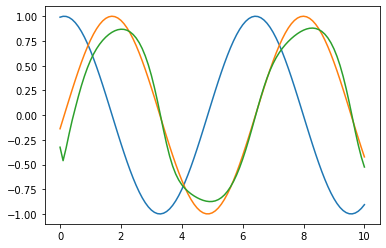

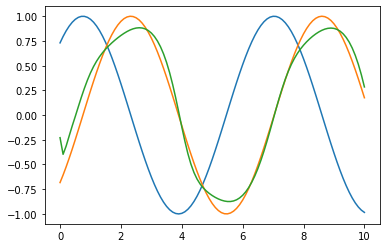

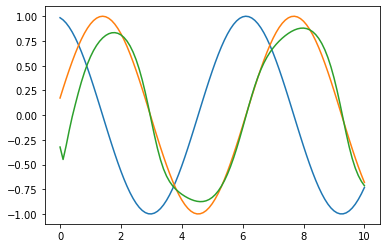

In [7]:
rnn = torch.nn.RNN(size0, size1)
linear = torch.nn.Linear(size1, size2)

def model(SIGNAL):
    ACTIVITY1, _ = rnn(SIGNAL)
    ACTIVATION2 = linear(ACTIVITY1)
    ACTIVITY2 = ACTIVATION2
    return ACTIVITY2

optimizer = torch.optim.SGD(list(rnn.parameters()) + list(linear.parameters()), lr = 0.01)
for epoch in range(1000):
    RESULT = model(SIGNAL)
    LOSS = torch.square(RESULT - TARGET).mean()
    optimizer.zero_grad()
    LOSS.backward()
    optimizer.step()
    print(epoch, LOSS.item(), flush = True)

RESULT = model(SIGNAL).detach()

for sample in range(3):
    plt.plot(TIME, SIGNAL[:, sample, 0])
    plt.plot(TIME, TARGET[:, sample, 0])
    plt.plot(TIME, RESULT[:, sample, 0])
    plt.show()

In order to improve the net performance, use the Adam optimizer in place of the simple gradient descent:

0 0.5116925239562988
1 0.5090553164482117
2 0.5067278146743774
3 0.5047007203102112
4 0.5029603242874146
5 0.5014885067939758
6 0.5002613067626953
7 0.49925073981285095
8 0.49842697381973267
9 0.4977584481239319
10 0.497213214635849
11 0.49675995111465454
12 0.49636906385421753
13 0.49601417779922485
14 0.49567297101020813
15 0.49532753229141235
16 0.49496471881866455
17 0.49457573890686035
18 0.49415531754493713
19 0.493701308965683
20 0.49321338534355164
21 0.49269241094589233
22 0.49213939905166626
23 0.4915553033351898
24 0.490939736366272
25 0.4902912378311157
26 0.4896066188812256
27 0.4888804256916046
28 0.48810479044914246
29 0.48726919293403625
30 0.48635998368263245
31 0.48536017537117004
32 0.4842492640018463
33 0.4830028712749481
34 0.4815925657749176
35 0.47998496890068054
36 0.4781409502029419
37 0.47601479291915894
38 0.47355279326438904
39 0.47069162130355835
40 0.46735814213752747
41 0.4634687304496765
42 0.45893093943595886
43 0.45364683866500854
44 0.4475177824497223

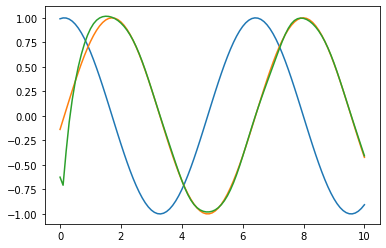

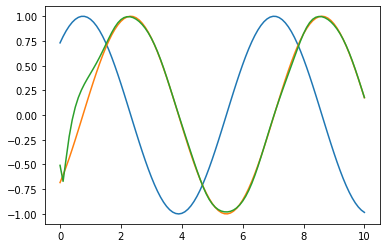

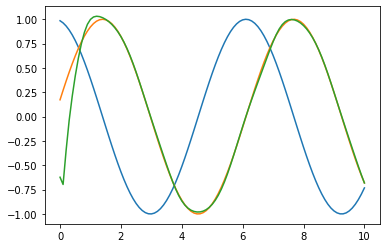

In [8]:
rnn = torch.nn.RNN(size0, size1)
linear = torch.nn.Linear(size1, size2)

def model(SIGNAL):
    ACTIVITY1, _ = rnn(SIGNAL)
    ACTIVATION2 = linear(ACTIVITY1)
    ACTIVITY2 = ACTIVATION2
    return ACTIVITY2

optimizer = torch.optim.Adam(list(rnn.parameters()) + list(linear.parameters()))
for epoch in range(1000):
    RESULT = model(SIGNAL)
    LOSS = torch.square(RESULT - TARGET).mean()
    optimizer.zero_grad()
    LOSS.backward()
    optimizer.step()
    print(epoch, LOSS.item(), flush = True)

RESULT = model(SIGNAL).detach()

for sample in range(3):
    plt.plot(TIME, SIGNAL[:, sample, 0])
    plt.plot(TIME, TARGET[:, sample, 0])
    plt.plot(TIME, RESULT[:, sample, 0])
    plt.show()

The Adam optimizer indeed yields a lower loss value, but the predicted signal is still not perfect. A problem with the simplest recurrent cell is that it too easily forgets the past that it should remember in the hidden state. Several improved cells have beed invented, like the Long Short-Term Memory (LSTM) and the Gated Recurrent Unit (GRU). They are used in the same way as the simplest cell. Use GRU:

0 0.524350643157959
1 0.5202284455299377
2 0.5163042545318604
3 0.5125751495361328
4 0.5090394020080566
5 0.5056940317153931
6 0.5025362372398376
7 0.49956169724464417
8 0.4967658519744873
9 0.49414312839508057
10 0.4916874170303345
11 0.48939162492752075
12 0.4872478246688843
13 0.48524728417396545
14 0.48338058590888977
15 0.48163747787475586
16 0.48000672459602356
17 0.47847646474838257
18 0.4770338535308838
19 0.47566521167755127
20 0.4743562340736389
21 0.47309163212776184
22 0.47185608744621277
23 0.4706335961818695
24 0.4694085121154785
25 0.4681653678417206
26 0.4668894410133362
27 0.46556708216667175
28 0.4641853868961334
29 0.46273335814476013
30 0.46120092272758484
31 0.45957955718040466
32 0.45786190032958984
33 0.45604172348976135
34 0.4541133940219879
35 0.4520718455314636
36 0.4499119222164154
37 0.4476280212402344
38 0.4452142119407654
39 0.4426632523536682
40 0.43996673822402954
41 0.43711450695991516
42 0.43409451842308044
43 0.430892676115036
44 0.4274927079677582
45

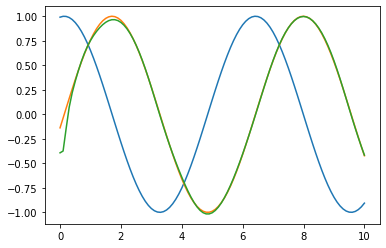

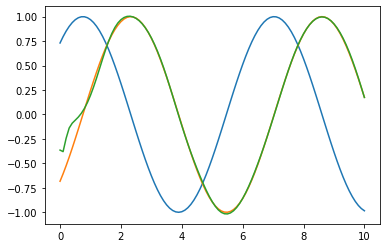

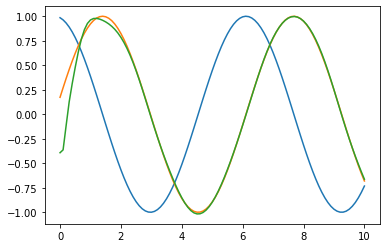

In [9]:
rnn = torch.nn.GRU(size0, size1)
linear = torch.nn.Linear(size1, size2)

def model(SIGNAL):
    ACTIVITY1, _ = rnn(SIGNAL)
    ACTIVATION2 = linear(ACTIVITY1)
    ACTIVITY2 = ACTIVATION2
    return ACTIVITY2

optimizer = torch.optim.Adam(list(rnn.parameters()) + list(linear.parameters()))
for epoch in range(1000):
    RESULT = model(SIGNAL)
    LOSS = torch.square(RESULT - TARGET).mean()
    optimizer.zero_grad()
    LOSS.backward()
    optimizer.step()
    print(epoch, LOSS.item(), flush = True)

RESULT = model(SIGNAL).detach()

for sample in range(3):
    plt.plot(TIME, SIGNAL[:, sample, 0])
    plt.plot(TIME, TARGET[:, sample, 0])
    plt.plot(TIME, RESULT[:, sample, 0])
    plt.show()

Now the retarded signal is reproduced almost perfectly. Instead of making the net reproduce the signal from the past, let it predict the signal in the future by appropriately changing the phase shift in the target:

0 0.5343273282051086
1 0.5297548770904541
2 0.5254130363464355
3 0.5212974548339844
4 0.5174042582511902
5 0.5137288570404053
6 0.5102652907371521
7 0.5070057511329651
8 0.5039414167404175
9 0.5010626912117004
10 0.4983593821525574
11 0.49582064151763916
12 0.4934360086917877
13 0.4911946952342987
14 0.489085853099823
15 0.4870983958244324
16 0.4852215051651001
17 0.4834444522857666
18 0.4817565679550171
19 0.4801476001739502
20 0.4786074459552765
21 0.47712621092796326
22 0.4756942689418793
23 0.47430220246315
24 0.47294050455093384
25 0.4716000556945801
26 0.4702717363834381
27 0.4689464271068573
28 0.4676150977611542
29 0.46626874804496765
30 0.46489861607551575
31 0.4634958505630493
32 0.46205154061317444
33 0.4605570137500763
34 0.45900362730026245
35 0.457382470369339
36 0.45568495988845825
37 0.453902006149292
38 0.45202475786209106
39 0.45004409551620483
40 0.44795048236846924
41 0.4457341730594635
42 0.4433850347995758
43 0.44089239835739136
44 0.43824464082717896
45 0.4354299

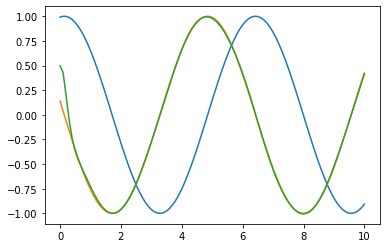

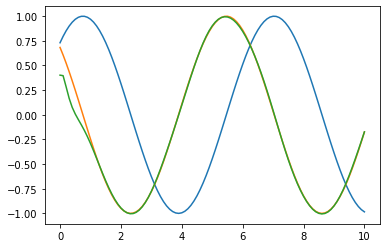

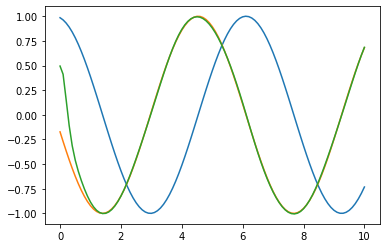

In [10]:
TARGET = torch.sin(TIME[:, None, None] + PHASE + math.pi / 2.)

rnn = torch.nn.GRU(size0, size1)
linear = torch.nn.Linear(size1, size2)

def model(SIGNAL):
    ACTIVITY1, _ = rnn(SIGNAL)
    ACTIVATION2 = linear(ACTIVITY1)
    ACTIVITY2 = ACTIVATION2
    return ACTIVITY2

optimizer = torch.optim.Adam(list(rnn.parameters()) + list(linear.parameters()))
for epoch in range(1000):
    RESULT = model(SIGNAL)
    LOSS = torch.square(RESULT - TARGET).mean()
    optimizer.zero_grad()
    LOSS.backward()
    optimizer.step()
    print(epoch, LOSS.item(), flush = True)

RESULT = model(SIGNAL).detach()

for sample in range(3):
    plt.plot(TIME, SIGNAL[:, sample, 0])
    plt.plot(TIME, TARGET[:, sample, 0])
    plt.plot(TIME, RESULT[:, sample, 0])
    plt.show()

The net can predict the future equally well as it can reproduce the past. This is because the net has learned what sinusoidal signals look like in general. Now it only needs a few initial frames to guess the following ones.